In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "price": [10, 12, 11],
    "units": [100, 90, 95]
})

df


,price,units
0,10,100
1,12,90
2,11,95


In [6]:
import pandas as pd

# load dataset
df = pd.read_csv("data/supermarket_sales.csv")

# show first 5 rows
df.head()



FileNotFoundError: [Errno 2] No such file or directory: 'data/supermarket_sales.csv'

In [7]:
import pandas as pd

# load dataset
df = pd.read_csv("data/supermarket_sales.csv")

# show first 5 rows
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/supermarket_sales.csv'

In [8]:
import os

os.listdir()


['.config', 'supermarket_sales.csv', 'sample_data']

In [9]:
import os
import shutil

os.makedirs("data", exist_ok=True)
shutil.move("supermarket_sales.csv", "data/supermarket_sales.csv")


'data/supermarket_sales.csv'

In [10]:
df = pd.read_csv("data/supermarket_sales.csv")
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [12]:
df = df.rename(columns={
    "Date": "date",
    "Product line": "product",
    "Unit price": "price",
    "Quantity": "units",
    "Total": "total",
    "Branch": "branch"
})

df["date"] = pd.to_datetime(df["date"])
df = df[(df["price"] > 0) & (df["units"] > 0)]
df["revenue"] = df["price"] * df["units"]

df.head()


,Invoice ID,branch,City,Customer type,Gender,product,price,units,Tax 5%,total,date,Time,Payment,cogs,gross margin percentage,gross income,Rating,revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17


In [13]:
df["week"] = df["date"].dt.to_period("W").apply(lambda r: r.start_time)



In [14]:
weekly_df = (
    df
    .groupby(["product", "branch", "week"])
    .agg(
        units=("units", "sum"),
        avg_price=("price", "mean"),
        revenue=("revenue", "sum")
    )
    .reset_index()
)

weekly_df.head()


,product,branch,week,units,avg_price,revenue
0,Electronic accessories,A,2018-12-31,17,84.050000,1399.36
1,Electronic accessories,A,2019-01-07,27,63.934000,1778.03
2,Electronic accessories,A,2019-01-14,17,33.043333,715.29
3,Electronic accessories,A,2019-01-21,39,46.070000,1540.96
4,Electronic accessories,A,2019-01-28,17,48.736000,662.81


In [15]:
weekly_df = weekly_df.sort_values(["product", "branch", "week"])


In [16]:
weekly_df.describe()


,week,units,avg_price,revenue
count,228,228.000000,228.000000,228.000000
mean,2019-02-10 15:53:41.052631552,24.166667,55.536081,1349.067456
min,2018-12-31 00:00:00,3.000000,12.290000,91.110000
25%,2019-01-21 00:00:00,15.750000,46.401042,755.250000
50%,2019-02-11 00:00:00,22.500000,54.556964,1269.615000
75%,2019-03-04 00:00:00,31.250000,64.060833,1786.567500
max,2019-03-25 00:00:00,69.000000,93.870000,3513.360000
std,NaN,12.015348,14.002987,759.853402


In [17]:
weekly_df.to_csv("data/weekly_sales.csv", index=False)


In [18]:
import pandas as pd

weekly_df = pd.read_csv("data/weekly_sales.csv")
weekly_df["week"] = pd.to_datetime(weekly_df["week"])


In [19]:
weekly_df["units_lag1"] = (
    weekly_df
    .groupby(["product", "branch"])["units"]
    .shift(1)
)

weekly_df["price_lag1"] = (
    weekly_df
    .groupby(["product", "branch"])["avg_price"]
    .shift(1)
)


In [20]:
weekly_df["units_roll4"] = (
    weekly_df
    .groupby(["product", "branch"])["units"]
    .shift(1)
    .rolling(4)
    .mean()
)


In [21]:
weekly_df["price_change"] = (
    (weekly_df["avg_price"] - weekly_df["price_lag1"])
    / weekly_df["price_lag1"]
)


In [22]:
weekly_df["week_of_year"] = weekly_df["week"].dt.isocalendar().week.astype(int)


In [23]:
feature_df = weekly_df.dropna().reset_index(drop=True)


In [24]:
feature_df.head()


,product,branch,week,units,avg_price,revenue,units_lag1,price_lag1,units_roll4,price_change,week_of_year
0,Electronic accessories,A,2019-01-28,17,48.7360,662.81,39.0,46.070,25.00,0.057868,5
1,Electronic accessories,A,2019-02-04,18,44.3200,841.29,17.0,48.736,25.00,-0.090611,6
2,Electronic accessories,A,2019-02-11,23,58.0280,1409.85,18.0,44.320,22.75,0.309296,7
3,Electronic accessories,A,2019-02-18,33,56.8760,1549.42,23.0,58.028,24.25,-0.019852,8
4,Electronic accessories,A,2019-02-25,25,63.3825,1609.26,33.0,56.876,22.75,0.114398,9


In [25]:
feature_df.to_csv("data/features.csv", index=False)


In [26]:
import pandas as pd

feature_df = pd.read_csv("data/features.csv")
feature_df["week"] = pd.to_datetime(feature_df["week"])


In [27]:
TARGET = "units"

FEATURES = [
    "avg_price",
    "units_lag1",
    "units_roll4",
    "price_lag1",
    "price_change",
    "week_of_year",
    "month"
]


In [28]:
# sort by time just in case
feature_df = feature_df.sort_values("week")

# choose cutoff (80% train, 20% test)
cutoff = feature_df["week"].quantile(0.8)

train_df = feature_df[feature_df["week"] <= cutoff]
test_df  = feature_df[feature_df["week"] > cutoff]

X_train = train_df[FEATURES]
y_train = train_df[TARGET]

X_test = test_df[FEATURES]
y_test = test_df[TARGET]

print(len(train_df), len(test_df))


KeyError: "['month'] not in index"

In [29]:
feature_df["month"] = feature_df["week"].dt.month


In [30]:
TARGET = "units"

FEATURES = [
    "avg_price",
    "units_lag1",
    "units_roll4",
    "price_lag1",
    "price_change",
    "week_of_year",
    "month"
]


In [31]:
# sort by time just in case
feature_df = feature_df.sort_values("week")

# choose cutoff (80% train, 20% test)
cutoff = feature_df["week"].quantile(0.8)

train_df = feature_df[feature_df["week"] <= cutoff]
test_df  = feature_df[feature_df["week"] > cutoff]

X_train = train_df[FEATURES]
y_train = train_df[TARGET]

X_test = test_df[FEATURES]
y_test = test_df[TARGET]

print(len(train_df), len(test_df))


140 16


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

baseline_preds = baseline_model.predict(X_test)

baseline_mae = mean_absolute_error(y_test, baseline_preds)
baseline_mae


11.84867522144696

In [33]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_mae


14.440720558166504

In [34]:
print(f"Baseline MAE: {baseline_mae:.2f}")
print(f"XGBoost MAE: {xgb_mae:.2f}")


Baseline MAE: 11.85
XGBoost MAE: 14.44


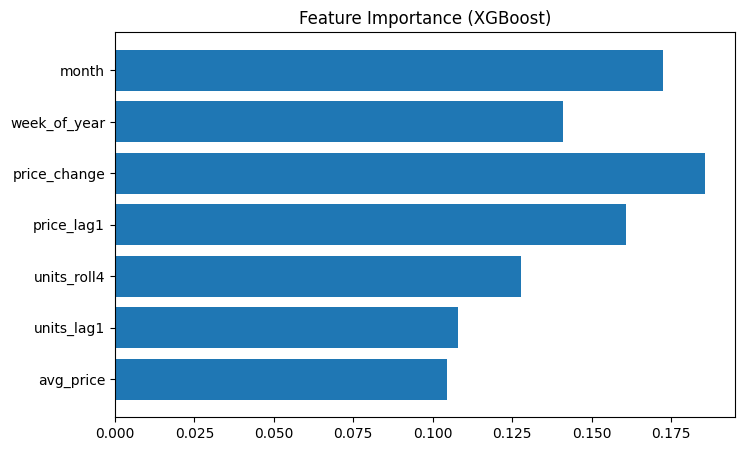

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(FEATURES, xgb_model.feature_importances_)
plt.title("Feature Importance (XGBoost)")
plt.show()


In [36]:
# assume cost is 70% of last week's price (baseline)
test_df = test_df.copy()
test_df["cost"] = 0.70 * test_df["price_lag1"]


In [37]:
price_multipliers = [0.90, 0.95, 1.00, 1.05, 1.10]


In [38]:
import numpy as np
import pandas as pd

def choose_best_price(row, model, features, multipliers, min_margin=0.15, max_move=0.10):
    base_price = row["avg_price"]
    cost = row["cost"]

    candidates = []

    for m in multipliers:
        cand_price = base_price * m

        # enforce max move rule (already matches our multipliers, but keep it explicit)
        if abs(cand_price - base_price) / base_price > max_move:
            continue

        # margin rule
        margin = (cand_price - cost) / cand_price
        if margin < min_margin:
            continue

        # build feature row for prediction
        x = row[features].copy()
        x["avg_price"] = cand_price
        x["price_change"] = (cand_price - row["price_lag1"]) / row["price_lag1"]

        pred_units = float(model.predict(pd.DataFrame([x]))[0])
        pred_units = max(pred_units, 0)  # no negative sales

        revenue = cand_price * pred_units
        profit = (cand_price - cost) * pred_units

        candidates.append({
            "chosen_price": cand_price,
            "pred_units": pred_units,
            "pred_revenue": revenue,
            "pred_profit": profit,
            "margin": margin
        })

    # if everything got blocked by constraints, fall back to base price
    if len(candidates) == 0:
        cand_price = base_price
        margin = (cand_price - cost) / cand_price

        x = row[features].copy()
        x["avg_price"] = cand_price
        x["price_change"] = (cand_price - row["price_lag1"]) / row["price_lag1"]

        pred_units = float(model.predict(pd.DataFrame([x]))[0])
        pred_units = max(pred_units, 0)

        revenue = cand_price * pred_units
        profit = (cand_price - cost) * pred_units

        return pd.Series({
            "chosen_price": cand_price,
            "chosen_units": pred_units,
            "chosen_revenue": revenue,
            "chosen_profit": profit,
            "chosen_margin": margin,
            "blocked_all": 1
        })

    best = max(candidates, key=lambda d: d["pred_profit"])

    return pd.Series({
        "chosen_price": best["chosen_price"],
        "chosen_units": best["pred_units"],
        "chosen_revenue": best["pred_revenue"],
        "chosen_profit": best["pred_profit"],
        "chosen_margin": best["margin"],
        "blocked_all": 0
    })


In [39]:
results = test_df.apply(
    lambda row: choose_best_price(row, xgb_model, FEATURES, price_multipliers),
    axis=1
)

pricing_df = pd.concat([test_df.reset_index(drop=True), results], axis=1)
pricing_df.head()


,product,branch,week,units,avg_price,revenue,units_lag1,price_lag1,units_roll4,price_change,week_of_year,month,cost,chosen_price,chosen_units,chosen_revenue,chosen_profit,chosen_margin,blocked_all
0,Fashion accessories,A,2019-03-25,11.0,55.040000,676.44,14.0,43.016667,18.75,0.279504,13.0,3.0,30.111667,NaN,NaN,NaN,NaN,NaN,NaN
1,Food and beverages,B,2019-03-25,8.0,51.623333,371.21,6.0,50.390000,15.75,0.024476,13.0,3.0,35.273000,NaN,NaN,NaN,NaN,NaN,NaN
2,Food and beverages,C,2019-03-25,30.0,43.330000,1278.49,15.0,45.635000,27.25,-0.050509,13.0,3.0,31.944500,NaN,NaN,NaN,NaN,NaN,NaN
3,Fashion accessories,B,2019-03-25,3.0,30.370000,91.11,25.0,54.410000,25.75,-0.441831,13.0,3.0,38.087000,NaN,NaN,NaN,NaN,NaN,NaN
4,Food and beverages,A,2019-03-25,30.0,59.704286,1704.62,19.0,66.898333,23.75,-0.107537,13.0,3.0,46.828833,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# baseline predictions at existing price (no change)
baseline_units = xgb_model.predict(test_df[FEATURES])
baseline_units = np.maximum(baseline_units, 0)

pricing_df["baseline_units"] = baseline_units
pricing_df["baseline_profit"] = (pricing_df["avg_price"] - pricing_df["cost"]) * pricing_df["baseline_units"]

total_baseline_profit = pricing_df["baseline_profit"].sum()
total_opt_profit = pricing_df["chosen_profit"].sum()

uplift_pct = (total_opt_profit - total_baseline_profit) / total_baseline_profit * 100

total_baseline_profit, total_opt_profit, uplift_pct


ValueError: Length of values (16) does not match length of index (31)

In [41]:
test_df2 = test_df.reset_index(drop=True).copy()


In [42]:
results = test_df2.apply(
    lambda row: choose_best_price(row, xgb_model, FEATURES, price_multipliers),
    axis=1
)

pricing_df = pd.concat([test_df2, results], axis=1)
print(len(test_df2), len(results), len(pricing_df))


16 16 16


In [43]:
import numpy as np

baseline_units = xgb_model.predict(test_df2[FEATURES])
baseline_units = np.maximum(baseline_units, 0)

pricing_df["baseline_units"] = baseline_units
pricing_df["baseline_profit"] = (pricing_df["avg_price"] - pricing_df["cost"]) * pricing_df["baseline_units"]

total_baseline_profit = pricing_df["baseline_profit"].sum()
total_opt_profit = pricing_df["chosen_profit"].sum()

uplift_pct = (total_opt_profit - total_baseline_profit) / total_baseline_profit * 100

total_baseline_profit, total_opt_profit, uplift_pct


(np.float64(5768.286956444009),
 np.float64(7329.41579997348),
 np.float64(27.063994134089754))

In [44]:
import numpy as np
import matplotlib.pyplot as plt

pricing_df["price_change_pct"] = (pricing_df["chosen_price"] - pricing_df["avg_price"]) / pricing_df["avg_price"] * 100
pricing_df[["avg_price", "chosen_price", "price_change_pct"]].head()


,avg_price,chosen_price,price_change_pct
0,55.040000,57.792000,5.0
1,51.623333,54.204500,5.0
2,43.330000,45.496500,5.0
3,30.370000,30.370000,0.0
4,59.704286,65.674714,10.0


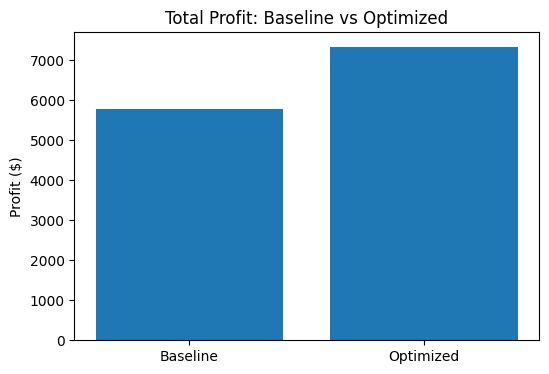

In [45]:
total_baseline_profit = pricing_df["baseline_profit"].sum()
total_opt_profit = pricing_df["chosen_profit"].sum()

plt.figure(figsize=(6,4))
plt.bar(["Baseline", "Optimized"], [total_baseline_profit, total_opt_profit])
plt.title("Total Profit: Baseline vs Optimized")
plt.ylabel("Profit ($)")
plt.show()


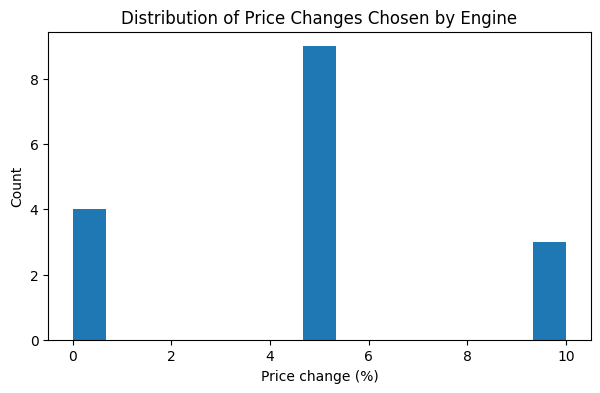

In [46]:
plt.figure(figsize=(7,4))
plt.hist(pricing_df["price_change_pct"], bins=15)
plt.title("Distribution of Price Changes Chosen by Engine")
plt.xlabel("Price change (%)")
plt.ylabel("Count")
plt.show()


In [47]:
pricing_df["profit_uplift"] = pricing_df["chosen_profit"] - pricing_df["baseline_profit"]


In [48]:
top_products = (
    pricing_df.groupby("product")["profit_uplift"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products


,profit_uplift
product,
Food and beverages,550.961853
Health and beauty,353.368090
Electronic accessories,281.553939
Fashion accessories,259.752292
Sports and travel,63.908530
Home and lifestyle,51.584140


In [49]:
uplift_pct = (total_opt_profit - total_baseline_profit) / total_baseline_profit * 100

summary = {
    "Total baseline profit": total_baseline_profit,
    "Total optimized profit": total_opt_profit,
    "Profit uplift (%)": uplift_pct,
    "Avg price change (%)": pricing_df["price_change_pct"].mean(),
    "Blocked by rules (%)": pricing_df["blocked_all"].mean() * 100
}

summary


{'Total baseline profit': np.float64(5768.286956444009),
 'Total optimized profit': np.float64(7329.41579997348),
 'Profit uplift (%)': np.float64(27.063994134089754),
 'Avg price change (%)': np.float64(4.687500000000001),
 'Blocked by rules (%)': np.float64(25.0)}